In [5]:
import numpy as np
import matplotlib.pyplot as plt


Завдання 1

1) генерування точок для лінійної регресії

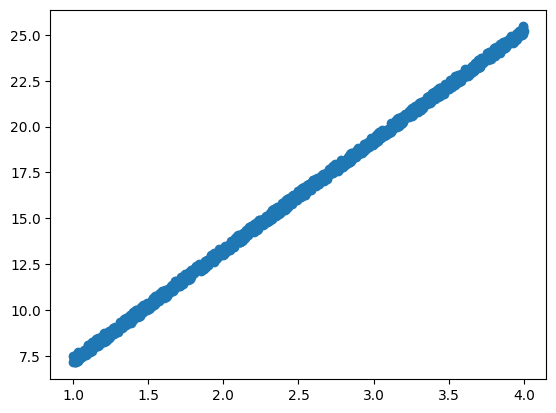

In [6]:

np.random.seed(42)
n = 1000
X = np.linspace(1, 4, n)

Y = 6 * X + 1 + np.random.uniform(0, 0.5, n) # Лінійно з шумом

plt.scatter(X, Y)

In [7]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.t0 = 0
        self.t1 = 0

    def train(self, X, Y):
        x_size = len(X)
        losses = []

        for _ in range(self.n_iterations):
            loss = 0
            for j in range(x_size):
                y_pred = self.t0 * X[j] + self.t1

                t0_gradient = -2 * (Y[j] - y_pred) * X[j]
                t1_gradient = -2 * (Y[j] - y_pred)

                self.t0 -= self.learning_rate * t0_gradient
                self.t1 -= self.learning_rate * t1_gradient

                loss += (Y[j] - y_pred) ** 2  # обчислення середньоквадратичної помилки (MSE) між фактичними та прогнозованими значеннями
            losses.append(loss / x_size)
        return losses

    def predict(self, X):
        return self.t0 * X + self.t1

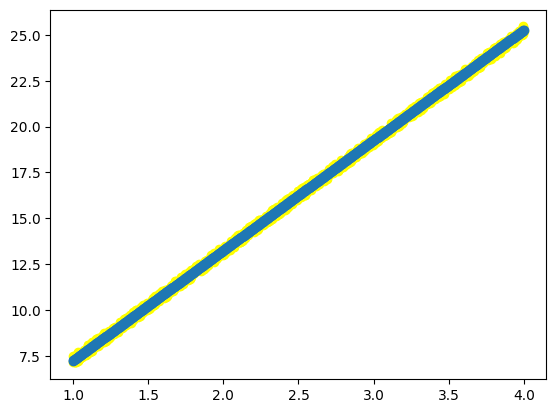

In [9]:
linear_regression = LinearRegression()
losses = linear_regression.train(X, Y)

plt.scatter(X, Y, color = 'yellow')
plt.scatter(X, linear_regression.predict(X))


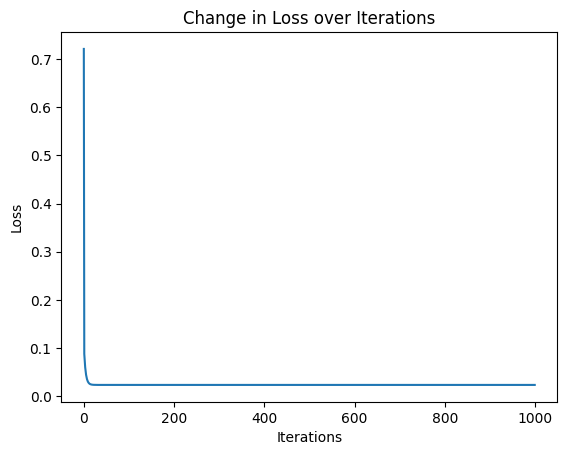

In [35]:

plt.plot(range(len(losses)), losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Change in Loss over Iterations')
plt.show()

Завдання 2

1) генерування точок для логістичної регресії

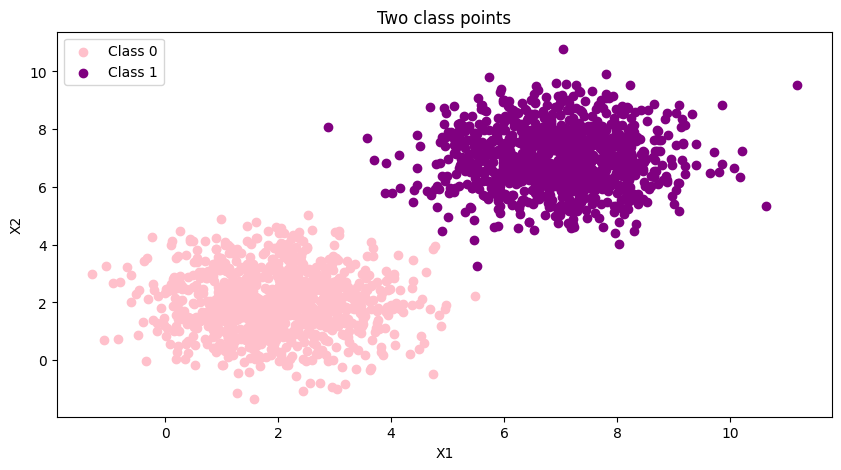

In [36]:
# Задаємо налаштування для генерації даних
np.random.seed(0)
n = 1000
noise = 1.1

# Генеруємо перший набір точок
X1 = np.random.normal(2, noise, (n, 2))

# Генеруємо другий набір точок
X2 = np.random.normal(7, noise, (n, 2))

# Візуалізуємо дані
plt.figure(figsize=(10, 5))
plt.scatter(X1[:, 0], X1[:, 1], color='pink', label='Class 0')  
plt.scatter(X2[:, 0], X2[:, 1], color='purple', label='Class 1')  
plt.title('Two class points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [37]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, X, y):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        loss = -(1/len(y)) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(1, self.n_iterations + 1):
            for i in range(n_samples):
                # Take a random sample
                sample_X = X[i]
                sample_y = y[i]

                # Compute gradients
                z = np.dot(self.weights.T, sample_X) + self.bias
                y_pred = self.sigmoid(z)
                gr_wrt_weights = sample_X * (sample_y - y_pred)
                gr_wrt_bias = sample_y - y_pred

                # Update weights and bias
                self.weights += self.learning_rate * gr_wrt_weights
                self.bias += self.learning_rate * gr_wrt_bias

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(z)
        y_predicted_cls = [1 if i >= 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def accuracy(self, X, y):
        y_predicted = self.predict(X)
        accuracy = np.mean(y_predicted == y)
        return accuracy * 100


In [38]:
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(n), np.ones(n)))

model = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model.train(X, y)

print("Accuracy: " + str(model.accuracy(X,y))) # Оцінка точності
print("Log_loss: " + str(model.log_loss(X, y))) # Оцінка втрат


Accuracy: 99.95
Log_loss: 0.0022453158862892407


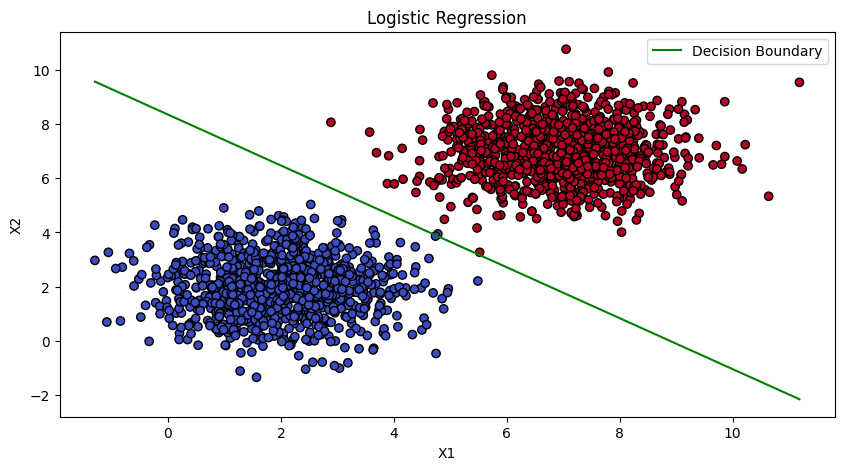

In [39]:
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(n), np.ones(n)))

# Навчаємо модель логістичної регресії
model = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model.train(X, y)

# Предікція та візуалізація розділяючої лінії
x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_values = -(model.weights[0] * x_values + model.bias) / model.weights[1]

plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.plot(x_values, y_values, color='green', label='Decision Boundary')
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()